<a href="https://colab.research.google.com/github/JSJeong-me/RPA-2023/blob/main/Time_Series/3_AAA_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m pip install prophet

In [2]:
import prophet
# print version number
print('Prophet %s' % prophet.__version__)

Prophet 1.1.3


In [3]:
import pandas as pd
df=pd.read_excel('AAA.xlsx', index_col='TS', parse_dates=True, dtype={'Value':float})
df.drop(['Unnamed: 0','Unnamed: 0.1', 'Time', 'Max Value','Date'], axis=1, inplace=True)
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(53567, 1)
                      Value
TS                         
2019-03-01 00:15:00  135.12
2019-03-01 00:30:00  131.28
2019-03-01 00:45:00  129.60
2019-03-01 01:00:00  126.48
2019-03-01 01:15:00  123.36


In [4]:
df_day=df.resample(rule='1H').sum()
df_day=df_day.reset_index()
#df_day.columns
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [5]:
df_day=df.resample(rule='D').sum()

In [6]:
df_day=df_day.reset_index()
df_day.rename(columns={'TS':'ds','Value':'y'},inplace=True)

In [7]:
from prophet import Prophet
from pandas import to_datetime

In [8]:
df_day.columns = ['ds', 'y']
df_day['ds']= to_datetime(df_day['ds'])

In [10]:
m = Prophet()
m.fit(df_day)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyz9lpfvl/n6obvujy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyz9lpfvl/rewghmak.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13317', 'data', 'file=/tmp/tmpyz9lpfvl/n6obvujy.json', 'init=/tmp/tmpyz9lpfvl/rewghmak.json', 'output', 'file=/tmp/tmpyz9lpfvl/prophet_modelga2krh83/prophet_model-20230616015730.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:57:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:57:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [11]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
918,2021-09-04
919,2021-09-05
920,2021-09-06
921,2021-09-07
922,2021-09-08


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
918,2021-09-04,51685.554525,29948.435511,72219.397442
919,2021-09-05,51411.492167,29813.475928,72170.195034
920,2021-09-06,51825.097780,30269.947682,72319.996037
921,2021-09-07,51908.259620,29600.101940,73013.949755
922,2021-09-08,52028.575533,30279.400277,72769.724834


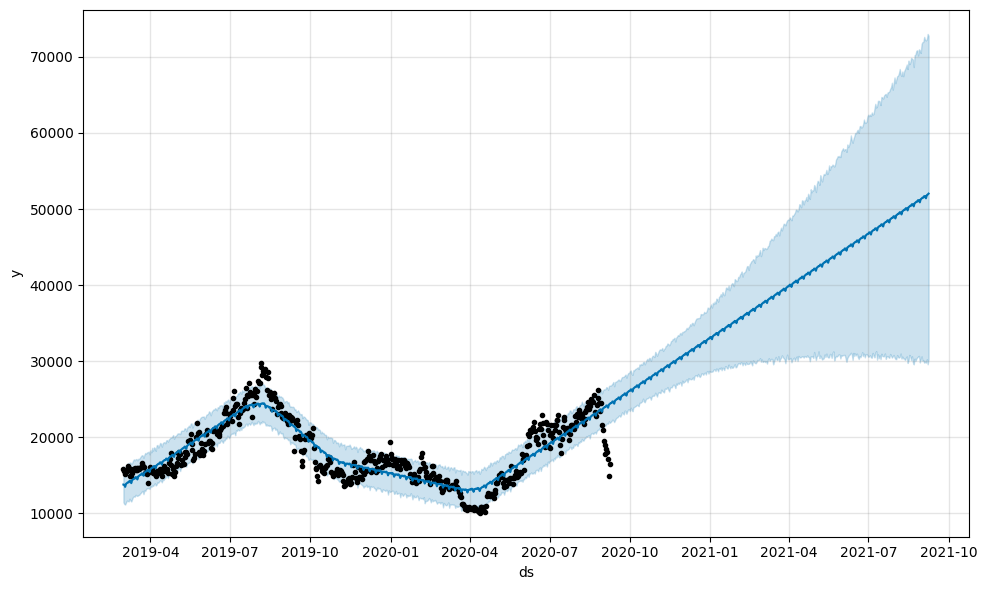

In [13]:
fig1 = m.plot(forecast)

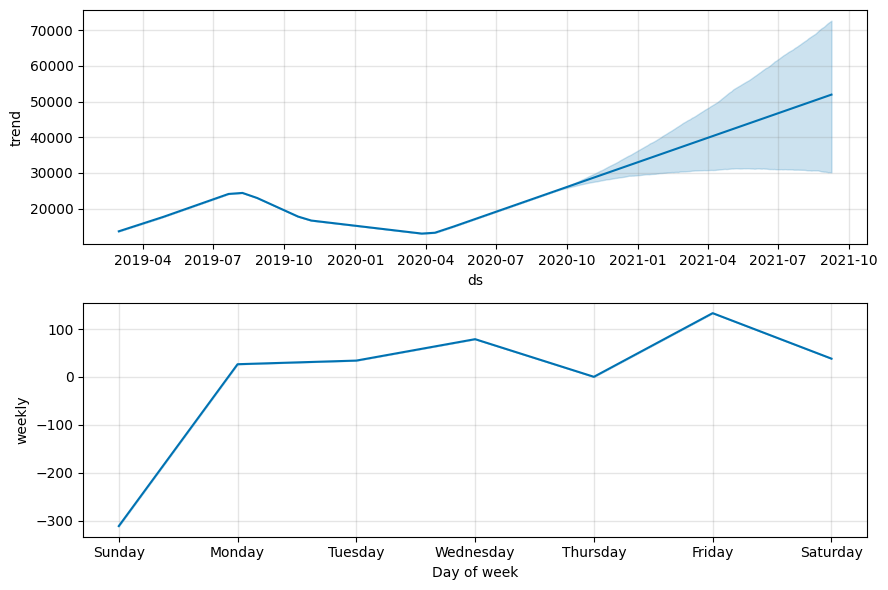

In [14]:
fig2 = m.plot_components(forecast)

In [15]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [16]:
plot_components_plotly(m, forecast)